In [3]:
import scipy as sc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pydataset import data
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

<h2> Ordinary Least Squares </h2>
<a>https://www.youtube.com/watch?v=b0L47BeklTE</a>

<AxesSubplot:xlabel='skin', ylabel='bmi'>

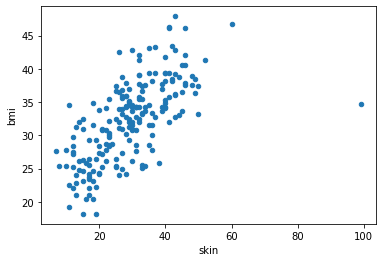

In [30]:
#reg = linear_model.LinearRegression()
pima = data('Pima.tr')

pima.plot(kind='scatter', x='skin', y='bmi')

In [4]:
# Test train split supervised learning
X_train, X_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

Text(0.5, 1.0, 'Test Train Split')

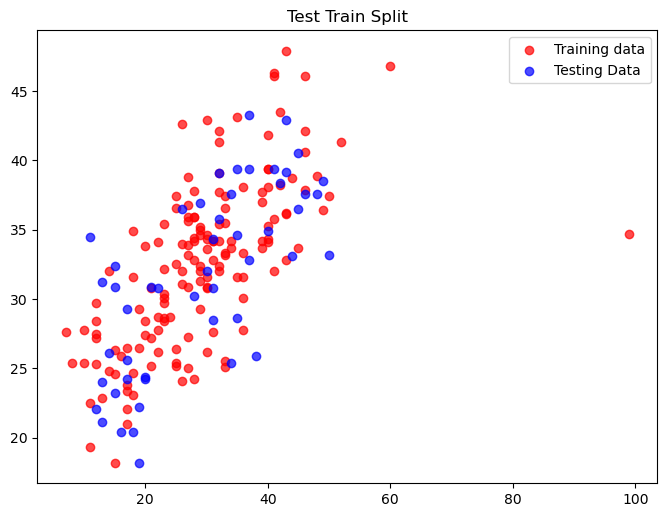

In [16]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_train, y_train, label="Training data", color='r', alpha=.7)
plt.scatter(X_test, y_test, label="Testing Data", color='b', alpha=0.7)
plt.legend()
plt.title("Test Train Split")

In [20]:
#Create Linear Training Model
LR = linear_model.LinearRegression()
LR.fit(X_train.values.reshape(-1, 1), y_train.values)

LinearRegression()

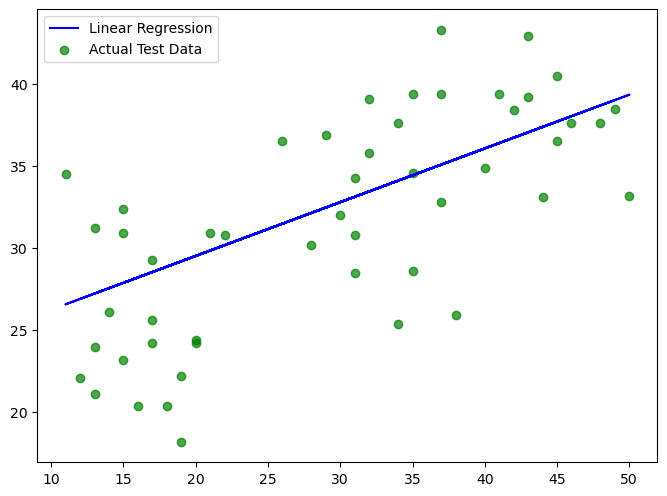

In [28]:
#Use model to predict on TEST data
prediction = LR.predict(X_test.values.reshape(-1, 1))


#Plot against actual test data
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(X_test, prediction, label="Linear Regression", color='b')
plt.scatter(X_test, y_test, label="Actual Test Data", color='g', alpha=0.7)
plt.legend()

In [29]:
#Score
LR.score(X_test.values.reshape(-1, 1), y_test.values)

0.46488458883860395

<h2> Elastic Net Regression</h2>
<p> Lasso Regression is best for using many uncorrelated/useless variables  </p> 

<p> Ridge Regression will use ALL of the variables (best when all of them are necessary) but will shrink the parameters. Elastic-Net starts with OLS (Residual Sum of Squares RSS) +  L1 Lasso Regression Penalty + L2 Ridge Regression Penalty  </p> 

This is a form of penalized or regularized regression; where penalties are added to the loss function as to reduce the coefficient values of the regression equation.

In [40]:
from sklearn import datasets
s
boston_dataset = datasets.load_boston()


/home/gugu/mambaforge/envs/bioinfo/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

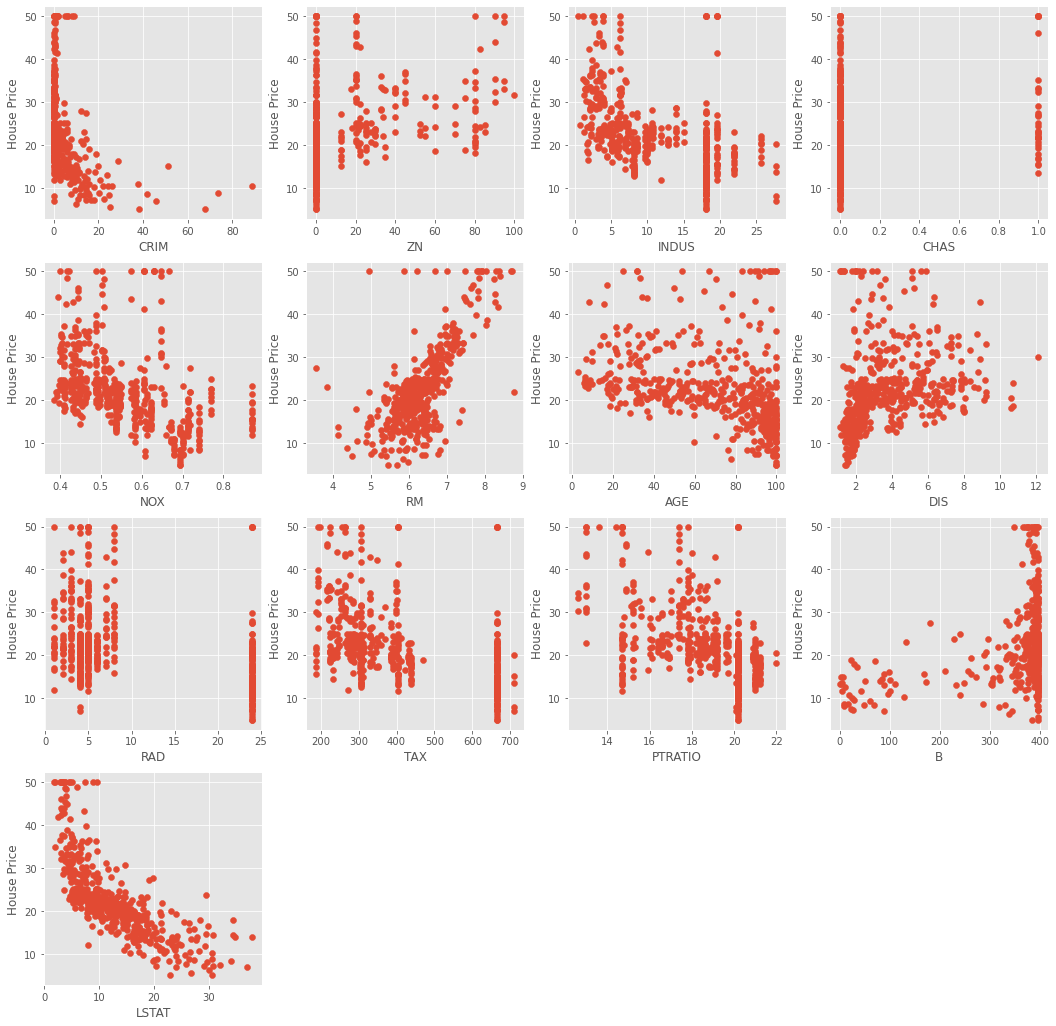

In [42]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (18, 18))
 
for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [96]:
#Load Boston into Pandas
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
#print(boston_dataset.target)
boston_pd_target = np.asarray(boston_dataset.target)
#Set Target Variable, 13 independent + 1 dependent
boston_pd['House Price'] = pd.Series(boston_pd_target)

#Remove Housing Price:
# input independent variables
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head(1))




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  House Price  
0  396.9   4.98         24.0  


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(X_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [91]:
#Import Model
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha = 0.5)
e_net.fit(X_train, y_train)

#Calculate Predicton and Mean SE
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test) ** 2)

print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 39.42581384475175


,Columns,Coefficient Estimate
0,CRIM,-0.080575
1,ZN,0.051510
2,INDUS,-0.083699
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.324343
6,AGE,0.018048
7,DIS,-0.946565
8,RAD,0.284051
9,TAX,-0.014675


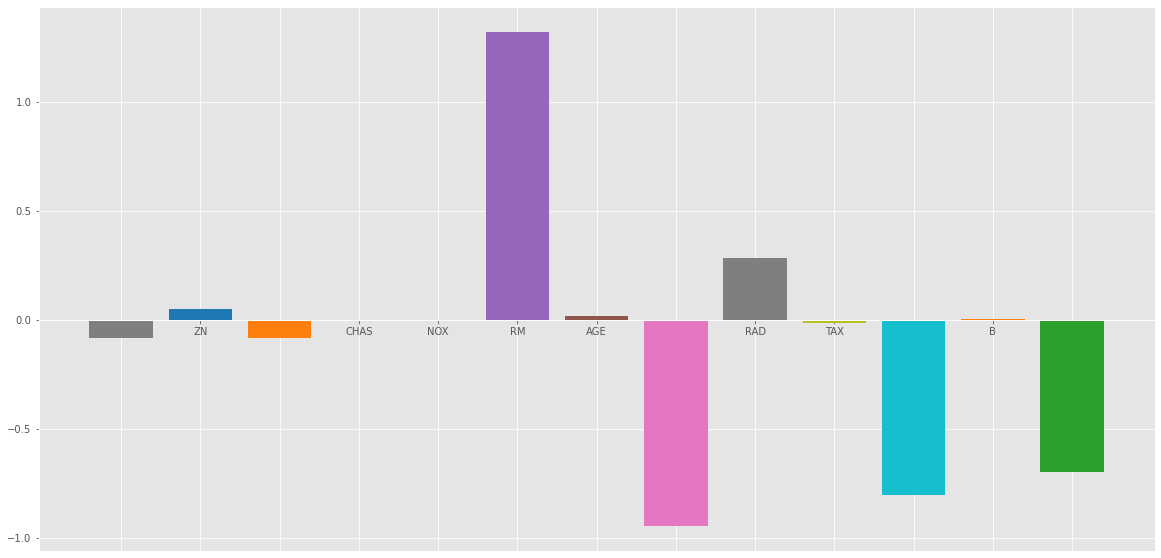

In [84]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(e_net_coeff["Columns"], e_net_coeff['Coefficient Estimate'], color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

<h2> Decision Trees Regression </h2>

<p> A simple, non-parametric model that can be used for regression and classification. It can be thought of as a piecewise constant approximation. Using depth levels, one can approximate the data to a certain degree. Is prone to overfitting and susceptible to variations in data. </p>

In [133]:
from sklearn.tree import DecisionTreeRegressor 

#Fit Decision Tree Regressor to the dataset, using Boston housing data again.
pd.set_option('display.max_columns', 20)
#print(boston_pd.head())

feature_name = "Black % of Population"
target_name = "Housing Price ($ Thousands)"

#print(Y)

data_train, target_train = X['B'], Y

d_reg = DecisionTreeRegressor(random_state=0 ) 

#print(Y)
d_reg.fit(X.values, Y.values)

data_test = pd.DataFrame(np.arange(data_train.min(), data_train.max()))
data_test


,0
0,0.32
1,1.32
2,2.32
3,3.32
4,4.32
...,...
392,392.32
393,393.32
394,394.32
395,395.32


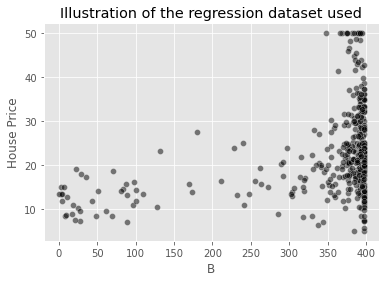

In [124]:
import seaborn as sns

sns.scatterplot(x=X['B'], y=Y, color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

plt.plot(X['B']], Y, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

In [138]:
# data_train
#target_train
#tree = DecisionTreeRegressor( max_depth =1)
#tree.fit(data_train, target_train)
#target_predicted = tree.predict(data_test)

TypeError: 'module' object is not callable

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]
Predicted price:  6625



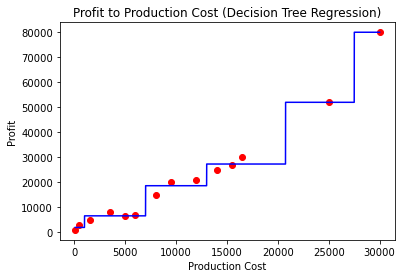

In [4]:
# import dataset


  
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
  
# print the dataset
#print(dataset) 

# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int) 
  
# print X
print(X)

# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int) 
  
# print y
print(y)

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=3)   
# fit the regressor with X and Y data
regressor.fit(X, y)

# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])
  
# print the predicted price
print("Predicted price: % d\n"% y_pred) 

# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

<h2> Neural Network Regression </h2>